# open weather 웹사이트의 API 이용
https://openweathermap.org/ > 회원가입 > 가입된 메일로 수신된 인증메일 확인


** 웹사이트에서
* API key : my_page > API keys 탭 > Acive된 key 복사
* url : 홈 > API 탭 > API Doc > 'API call'에 있는 url 복사
* > 옵션추가(&units={units}&lang=kr) 및 삭제(&exclude={part})
* > units="metric"으로 설정해야 섭씨로 변환된 데이터를 받을 수 있음



In [22]:
import pandas as pd
import folium, requests

API_KEY = "3a13faef60feb9ee2e031a50d54da7e9"
units = "metric"
# 날씨 데이터 가져오기
def get_weather_data(lat, lon):
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units={units}&lang=kr"
    res = requests.get(url)
    if res.status_code == 200:
        return res.json()
    else:
        return None


# lat 위도
# lon 경도
cities = [
    {"name":"서울", "lat":37.546966, "lon":126.978260},
    {"name":"부산", "lat":35.190576, "lon":128.930982},
    {"name":"대전", "lat":36.350955, "lon":127.382640},
    {"name":"대구", "lat":35.846210, "lon":128.564583}
]

# 날씨데이터 리스트
weather_data = []

# {'coord': {'lon': 126.9759, 'lat': 37.5493}, 
#  'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 
#  'base': 'stations', 
#  'main': {'temp': 273.47, 'feels_like': 269.96, 'temp_min': 272.97, 'temp_max': 273.99, 'pressure': 1026, 'humidity': 46, 'sea_level': 1026, 'grnd_level': 1016}, 
#  'visibility': 10000, 
#  'wind': {'speed': 3.09, 'deg': 300}, 
#  'clouds': {'all': 0}, 
#  'dt': 1734429637, 
#  'sys': {'type': 1, 'id': 8105, 'country': 'KR', 'sunrise': 1734388858, 'sunset': 1734423330}, 
#  'timezone': 32400, 
#  'id': 1837055, 
#  'name': 'Yongsan', 
#  'cod': 200}


for city in cities:
    data = get_weather_data(city['lat'], city['lon'])
    if data:
        weather_data.append({
            "city" : city['name'],
            'temperature' : data['main']['temp'],
            'weather' : data['weather'][0]['description'],
            'lat' : city['lat'],
            'lon' : city['lon']
        })

weather_df = pd.DataFrame(weather_data)
print(weather_df)


# 지도 생성
my_map = folium.Map(location=[36.351310, 127.948425], zoom_start=7)

# 마커추가
for _, row in weather_df.iterrows():
    popup_info = f"""
    <b>도시:</b> {row['city']}</br>
    <b>온도:</b> {row['temperature']} ℃</br>
    <b>날씨:</b> {row['weather']}
    """

    # 날씨에 따라 다른 색상의 마커
    icon_colors = "blue" if row['temperature'] < 0 else "green"     # 영하:파란색, 영상:녹색

    # 마커 생성
    folium.Marker(
        location=[ row['lat'], row['lon']],
        popup=folium.Popup(popup_info, min_width=100, max_width=200),       # wieth : 픽셀단위
        icon=folium.Icon(color=icon_colors, icon="cloud")
    ).add_to(my_map)


my_map.save(r"C:\Users\praye\Documents\git_weather_distribution\index.html")


  city  temperature       weather        lat         lon
0   서울        -0.61  약간의 구름이 낀 하늘  37.546966  126.978260
1   부산         3.01            맑음  35.190576  128.930982
2   대전        -0.32           튼구름  36.350955  127.382640
3   대구         3.84            맑음  35.846210  128.564583


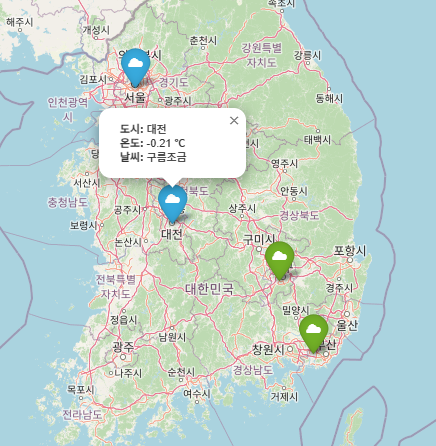

# html 파일 배포
1. 로컬 : 배포용 별도 git root 폴더 생성 (기존 코드와 꼬이지 않기위해서)
2. git bash : 배포용 git root로 폴더 이동 > git init 입력력
3. git hub : 배포용 repository 생성
4. git bash : git hub에서 신규 생성된 repository 설정하는 코드를 복사해서 입력
    - git remote add origin https://github.com/SeongYeun/weather_distribution.git 입력
    - git add > commit > push origin main
5. git hub : settings 탭 > pages 탭 > Branch 항목내 드롭다운을 None->main 변경 후 Save
6. 업로드한 html 확인
    - git hub > 배포용 repository > Settings > Pages > "Visit site" 클릭
    - 파일명이 index.html이 아닌 경우, 위의 visit site 클릭 후 나타난 화면의 주소 뒤에 해당 파일명을 더 입력해야 해당 내용이 출력됨
